# Student Grade Prediction Model

## Checking And Understanding DataSet

In [1]:
import pandas as pd

In [2]:
student = pd.read_csv("student_data.csv")

In [3]:
student.head()

,Quiz1,Quiz2,Assignment1,Assignment2,Attendance,StudyHours,ProjectScore,Midterm,Final,Grade
0,1.5,1.0,2.0,2.3,93,7.7,4.1,4.8,44.1,3
1,3.8,1.0,2.8,0.6,1,4.8,9.9,21.9,0.0,5
2,2.9,3.6,2.7,3.1,74,0.9,7.8,14.3,19.4,4
3,2.4,1.0,0.5,2.1,71,4.5,5.8,4.8,33.6,4
4,0.6,1.1,0.5,0.6,86,8.3,1.2,19.8,24.4,5


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Quiz1         2000 non-null   float64
 1   Quiz2         2000 non-null   float64
 2   Assignment1   2000 non-null   float64
 3   Assignment2   2000 non-null   float64
 4   Attendance    2000 non-null   int64  
 5   StudyHours    2000 non-null   float64
 6   ProjectScore  2000 non-null   float64
 7   Midterm       2000 non-null   float64
 8   Final         2000 non-null   float64
 9   Grade         2000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 156.4 KB


In [5]:
student['Quiz1'].value_counts()

Quiz1
2.5    67
0.7    64
0.3    61
3.5    60
0.5    59
0.1    59
3.9    56
3.2    56
2.8    56
0.4    54
2.0    53
2.6    53
2.4    53
1.4    52
1.0    52
2.1    52
2.2    51
2.9    51
0.6    49
3.6    48
3.7    48
1.7    48
3.8    48
0.9    48
3.3    48
1.6    48
1.8    47
1.1    47
3.0    47
0.2    47
1.5    45
1.3    45
3.1    44
2.3    43
2.7    42
3.4    41
1.2    39
1.9    37
0.8    35
4.0    26
0.0    21
Name: count, dtype: int64

In [6]:
student.describe()

,Quiz1,Quiz2,Assignment1,Assignment2,Attendance,StudyHours,ProjectScore,Midterm,Final,Grade
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1.994600,1.985300,1.737400,1.707400,74.65400,5.94880,5.039100,12.560700,19.558250,4.07850
std,1.170673,1.154916,1.009203,1.005764,23.62366,3.44941,2.854047,7.243234,15.969983,1.26457
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,0.900000,0.800000,71.00000,3.10000,2.600000,6.275000,3.400000,3.00000
50%,2.000000,2.000000,1.700000,1.700000,81.00000,5.90000,5.100000,12.550000,18.300000,5.00000
75%,3.000000,3.000000,2.600000,2.600000,91.00000,8.90000,7.500000,18.800000,32.700000,5.00000
max,4.000000,4.000000,3.500000,3.500000,100.00000,12.00000,10.000000,25.000000,49.900000,5.00000


## Multivariate Analysis

### Heat Map

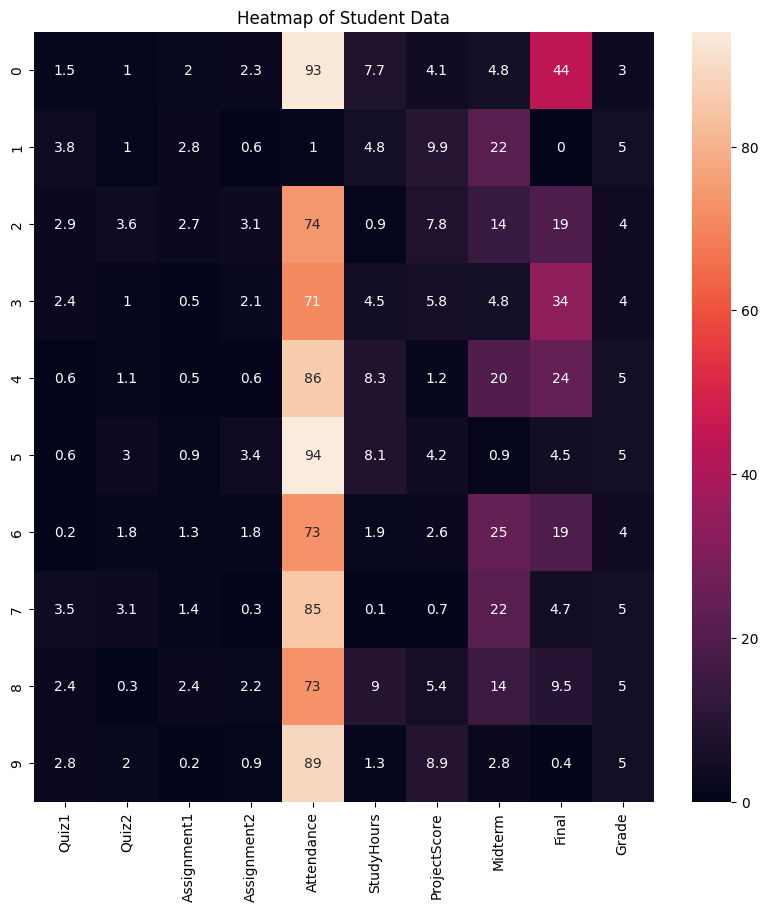

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

plt.title('Heatmap of Student Data')
sns.heatmap(student.head(10), annot=True, ax=ax)

# Set x-axis and y-axis labels
# ax.set_xticklabels(student.columns, rotation=45, ha="right")
# ax.set_yticklabels(student.index, rotation=0)

plt.show()

## For plotting histogram

In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'Quiz1'}>,
        <Axes: title={'center': 'Quiz2'}>,
        <Axes: title={'center': 'Assignment1'}>],
       [<Axes: title={'center': 'Assignment2'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'StudyHours'}>],
       [<Axes: title={'center': 'ProjectScore'}>,
        <Axes: title={'center': 'Midterm'}>,
        <Axes: title={'center': 'Final'}>],
       [<Axes: title={'center': 'Grade'}>, <Axes: >, <Axes: >]],
      dtype=object)

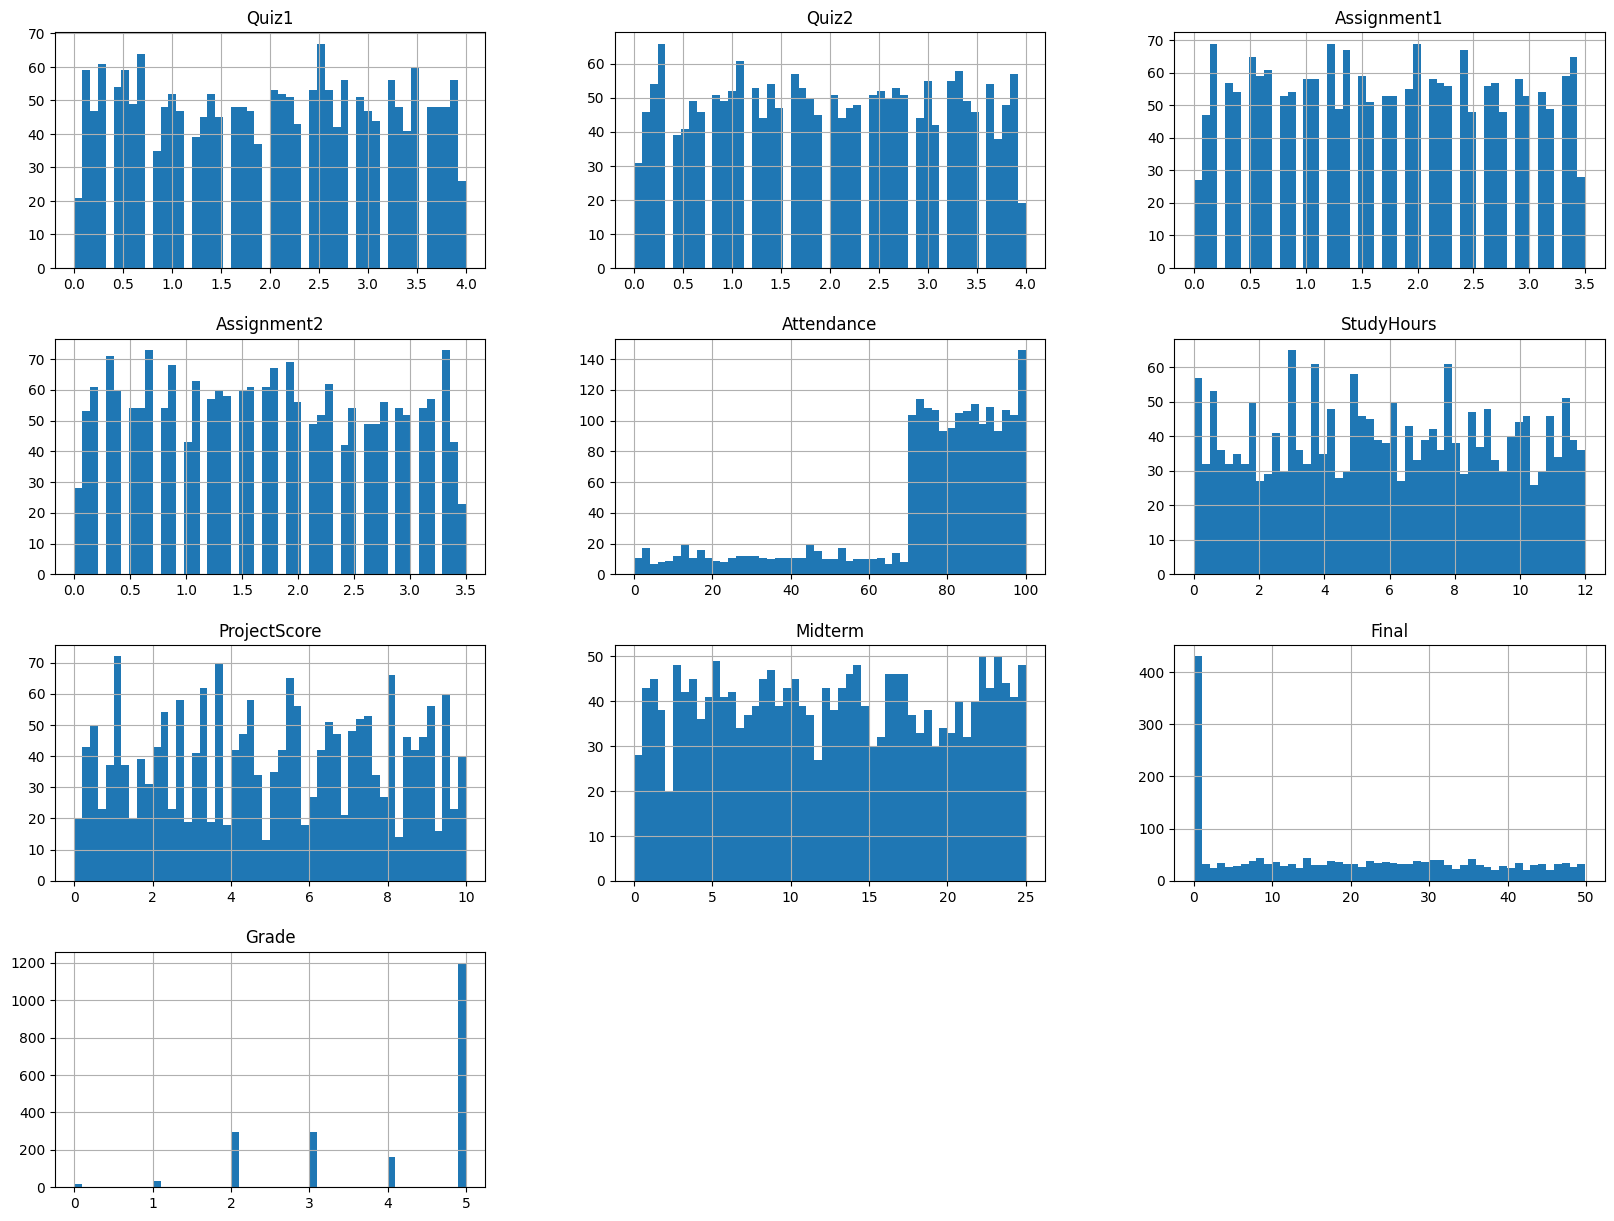

In [9]:
import matplotlib.pyplot as plt
student.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1600
Rows in test set: 400



### Applying Stratified Shuffle Split To One Column

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(student, student['Quiz2']):
    strat_train_set = student.loc[train_index]
    strat_test_set = student.loc[test_index]

In [12]:
strat_test_set['Quiz2'].value_counts()

Quiz2
0.3    13
3.3    12
1.1    12
1.4    11
1.7    11
0.2    11
2.7    11
1.6    11
1.2    11
3.2    11
3.9    11
3.0    11
3.6    11
0.8    10
2.5    10
2.0    10
2.8    10
0.9    10
2.6    10
1.8    10
2.3    10
0.6    10
1.0    10
2.4    10
3.4    10
3.8    10
2.1     9
2.9     9
1.9     9
0.1     9
3.5     9
1.3     9
0.7     9
2.2     9
1.5     9
0.5     8
0.4     8
3.1     8
3.7     8
0.0     6
4.0     4
Name: count, dtype: int64

In [13]:
strat_train_set['Quiz2'].value_counts()

Quiz2
0.3    53
1.1    49
3.3    46
3.9    46
1.6    46
3.2    44
3.0    44
1.4    43
3.6    43
0.2    43
1.7    42
1.0    42
1.2    42
2.7    42
2.5    42
2.8    41
2.0    41
0.8    41
2.4    41
1.8    40
2.6    40
0.9    39
0.6    39
3.4    39
2.2    38
3.8    38
2.3    38
1.5    38
3.5    37
0.7    37
0.1    37
1.9    36
2.9    35
1.3    35
2.1    35
3.1    34
0.5    33
0.4    31
3.7    30
0.0    25
4.0    15
Name: count, dtype: int64

## Looking for Correlations

In [14]:
corr_matrix = student.corr()
corr_matrix['Grade'].sort_values(ascending=False)

Grade           1.000000
Quiz2          -0.037024
StudyHours     -0.038885
Assignment1    -0.069291
Assignment2    -0.074166
Quiz1          -0.081286
ProjectScore   -0.125527
Midterm        -0.310209
Attendance     -0.312733
Final          -0.823296
Name: Grade, dtype: float64

array([[<Axes: xlabel='Grade', ylabel='Grade'>,
        <Axes: xlabel='Quiz2', ylabel='Grade'>,
        <Axes: xlabel='Assignment1', ylabel='Grade'>,
        <Axes: xlabel='Final', ylabel='Grade'>],
       [<Axes: xlabel='Grade', ylabel='Quiz2'>,
        <Axes: xlabel='Quiz2', ylabel='Quiz2'>,
        <Axes: xlabel='Assignment1', ylabel='Quiz2'>,
        <Axes: xlabel='Final', ylabel='Quiz2'>],
       [<Axes: xlabel='Grade', ylabel='Assignment1'>,
        <Axes: xlabel='Quiz2', ylabel='Assignment1'>,
        <Axes: xlabel='Assignment1', ylabel='Assignment1'>,
        <Axes: xlabel='Final', ylabel='Assignment1'>],
       [<Axes: xlabel='Grade', ylabel='Final'>,
        <Axes: xlabel='Quiz2', ylabel='Final'>,
        <Axes: xlabel='Assignment1', ylabel='Final'>,
        <Axes: xlabel='Final', ylabel='Final'>]], dtype=object)

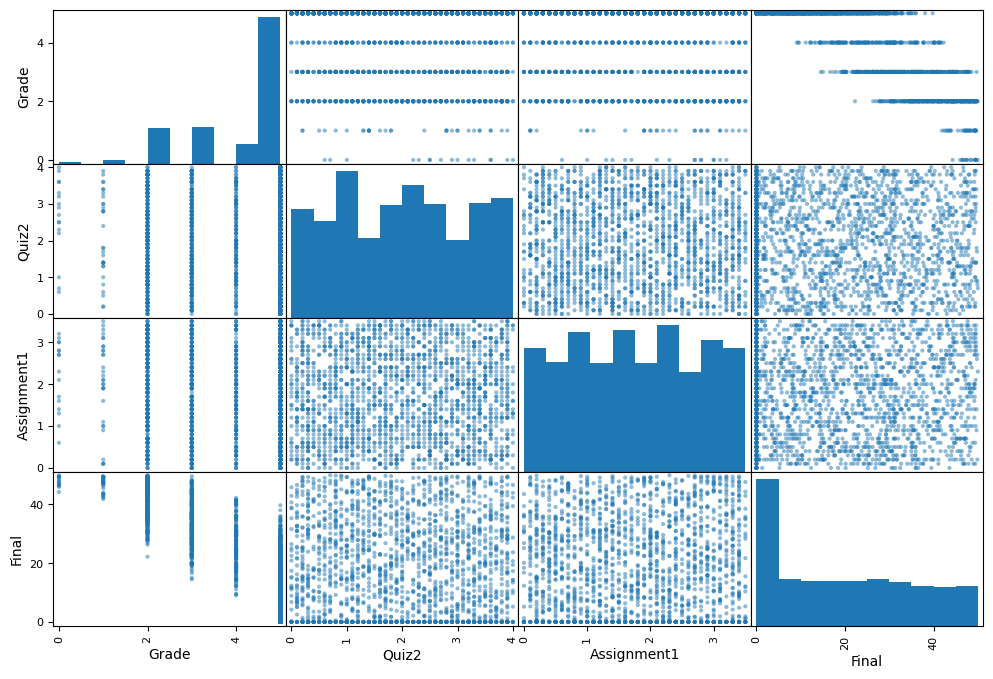

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["Grade", "Quiz2", "Assignment1", "Final"]
scatter_matrix(student[attributes], figsize = (12,8))

<Axes: xlabel='Quiz2', ylabel='Grade'>

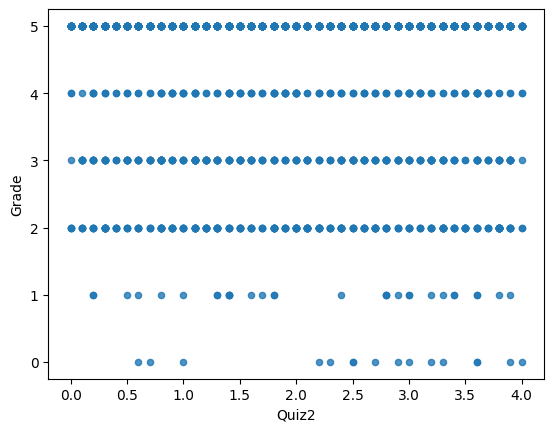

In [16]:
student.plot(kind="scatter", x="Quiz2", y="Grade", alpha=0.8)

In [17]:
student = strat_train_set.drop("Grade", axis=1)
student_labels = strat_train_set["Grade"].copy()

## Selecting A Desired Model for Student Grade Prediction

In [18]:
# 1. Using LogisticsRegression Classifier

# from sklearn.linear_model import LogisticRegression

# classifier = LogisticRegression(solver='lbfgs')
# classifier.fit(student, student_labels)

In [19]:
# 2. Using Random Forest Classifier

# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier()
# classifier.fit(student, student_labels)

In [20]:
# 3. Using Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(student, student_labels)

GradientBoostingClassifier()

In [21]:
# 4. Using Support Vector Machine Classifier

# from sklearn.svm import SVC

# classifier = SVC()
# classifier.fit(student, student_labels)

In [22]:
# 5. Using K-Nearest Neighbors (KNN) Classifier


In [23]:
# 6. Using Multilayer Perceptron (MLP) Classifier


In [24]:
some_data = student.iloc[:5]

some_labels = student_labels.iloc[:5]

In [25]:
classifier.predict(some_data)

array([2, 5, 5, 3, 2], dtype=int64)

In [26]:
list(some_labels)

[2, 5, 5, 3, 2]

## Evaluating The Model ( Accuracy )

In [27]:
from sklearn.metrics import accuracy_score
import numpy as np

student_predictions = classifier.predict(student)

In [28]:
accuracy = accuracy_score(student_labels, student_predictions)

In [29]:
accuracy

0.999375

## Using better evaluation technique - Cross Validation

In [30]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(classifier, student, student_labels, scoring="accuracy", cv=10)

## Printing Score

In [31]:
# print(scores)
# print("\n")
# print(scores.mean())

## Saving The Model ( For Latter Use )

In [32]:
from joblib import dump, load
dump(classifier, "Student_Prediction.joblib")

['Student_Prediction.joblib']

## Testing The Model ( On Test DataSet )

In [33]:
X_test = strat_test_set.drop("Grade", axis=1)
Y_test = strat_test_set["Grade"].copy()
# X_test_prepared = my_pipeline.transform(X_test)
# reshaped_array = student_label.reshape(-1, 1)
final_predications = classifier.predict(X_test)

## Checking Accuracy of Testing DataSet

In [34]:
# Checking Accuracy
accuracy = accuracy_score(Y_test, final_predications)
accuracy

0.8275